In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')
require('ggplot2')
require('dplyr')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
In addition: Warning message:
package ‘lubridate’ was built under R version 4.3.3 


In [28]:
%%R
 
library(readxl)

# Read only the 'School-level' sheet
df <- read_excel("2024.xlsx", sheet = "School-level")


In [29]:
%%R
colnames(df)

[1] "DBN"                             "School Name"                    
[3] "# Total Students"                "# Students in Temporary Housing"
[5] "% Students in Temporary Housing" "# Students Residing in Shelter" 
[7] "# Residing in DHS Shelter"       "# Residing in Non-DHS Shelter"  
[9] "# Doubled Up"                   


In [30]:
%%R

clean_names <- c(
  "dbn",
  "school_name",
  "total_students",
  "students_temp_housing",
  "pct_temp_housing",
  "students_residing_shelter",
  "residing_dhs_shelter",
  "residing_non_dhs_shelter",
  "doubled_up"
)

colnames(df) <- clean_names

In [31]:
%%R

df

# A tibble: 1,696 × 9
   dbn    school_name      total_students students_temp_housing pct_temp_housing
   <chr>  <chr>                     <dbl> <chr>                 <chr>           
 1 01M015 P.S. 015 Robert…            192 58                    0.3020833432999…
 2 01M020 P.S. 020 Anna S…            414 164                   0.3961352705999…
 3 01M034 P.S. 034 Frankl…            233 91                    0.3905579448    
 4 01M063 The STAR Academ…            212 55                    0.2594339549999…
 5 01M064 P.S. 064 Robert…            184 55                    0.2989130318000…
 6 01M110 P.S. 110 Floren…            256 28                    0.109375        
 7 01M134 P.S. 134 Henrie…            229 110                   0.4803493321000…
 8 01M140 P.S. 140 Nathan…            386 180                   0.4663212299000…
 9 01M142 P.S. 142 Amalia…            404 120                   0.2970297039    
10 01M184 P.S. 184m Shuan…            741 96                    0.1295546591    
# ℹ 1,

## merge with school level demographic data

In [32]:
%%R
# Read the demographic data
demographic <- read.csv("2024-demographic.csv")

# Perform the left join on DBN
merged_df <- left_join(demographic, df, by = c("DBN" = "dbn"))

In [33]:
%%R

merged_df$pct_temp_housing <- as.numeric(merged_df$pct_temp_housing) * 100

merged_df <- merged_df %>%
  filter(!is.na(pct_temp_housing))

In addition: Warning message:
In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion


## Race - on school level

In [34]:
%%R

model <- lm(pct_temp_housing~pct_asian, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_asian, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.972  -7.655  -1.984   5.178  65.021 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.52970    0.33837   60.67   <2e-16 ***
pct_asian   -0.29246    0.01632  -17.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.77 on 1583 degrees of freedom
Multiple R-squared:  0.1686,	Adjusted R-squared:  0.1681 
F-statistic: 321.1 on 1 and 1583 DF,  p-value: < 2.2e-16



In [35]:
%%R

model <- lm(pct_temp_housing~pct_white, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_white, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.736  -7.098  -2.141   4.498  65.661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.9775     0.3260   64.34   <2e-16 ***
pct_white    -0.3543     0.0168  -21.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.43 on 1583 degrees of freedom
Multiple R-squared:  0.2194,	Adjusted R-squared:  0.2189 
F-statistic:   445 on 1 and 1583 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


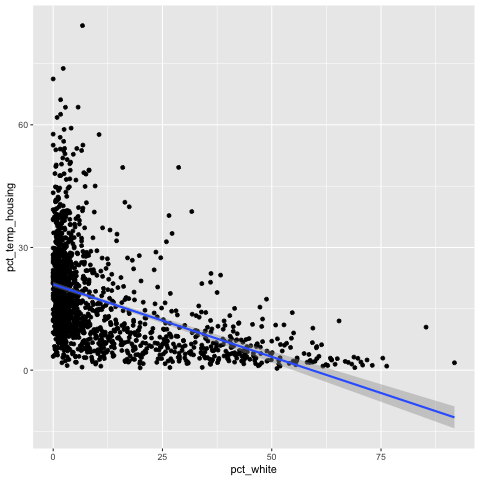

In [36]:
%%R 

ggplot(merged_df) + 
	aes(x=pct_white, y=pct_temp_housing) + 
	geom_point() +
	geom_smooth(method='lm')

In [37]:
%%R

model <- lm(pct_temp_housing~pct_hispanic, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_hispanic, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.555  -7.155  -2.363   4.811  57.616 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.88030    0.56643   10.38   <2e-16 ***
pct_hispanic  0.23572    0.01078   21.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 1583 degrees of freedom
Multiple R-squared:  0.2321,	Adjusted R-squared:  0.2316 
F-statistic: 478.3 on 1 and 1583 DF,  p-value: < 2.2e-16



In [38]:
%%R

model <- lm(pct_temp_housing~pct_black, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_black, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.495  -8.742  -2.774   5.814  69.299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.91208    0.44405  33.582  < 2e-16 ***
pct_black    0.07594    0.01282   5.925 3.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.68 on 1583 degrees of freedom
Multiple R-squared:  0.02169,	Adjusted R-squared:  0.02107 
F-statistic:  35.1 on 1 and 1583 DF,  p-value: 3.836e-09



## Economic index - school level

In [39]:
%%R

model <- lm(pct_temp_housing~economic_need_index, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ economic_need_index, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.682  -6.487  -1.751   4.181  62.205 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -12.61058    1.09830  -11.48   <2e-16 ***
economic_need_index   0.37360    0.01356   27.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.71 on 1583 degrees of freedom
Multiple R-squared:  0.324,	Adjusted R-squared:  0.3236 
F-statistic: 758.7 on 1 and 1583 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


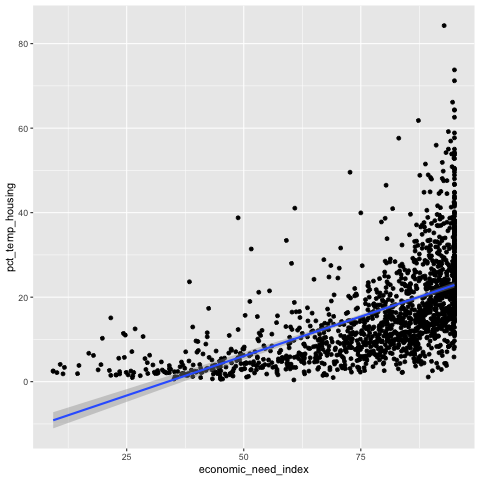

In [40]:
%%R 

ggplot(merged_df) + 
	aes(x=economic_need_index, y=pct_temp_housing) + 
	geom_point() +
	geom_smooth(method='lm')

## Poverty - on school level

In [41]:
%%R

model <- lm(pct_temp_housing~pct_poverty, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_poverty, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.890  -6.862  -1.966   4.458  62.267 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.44316    1.17722   -9.72   <2e-16 ***
pct_poverty   0.35201    0.01429   24.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.04 on 1583 degrees of freedom
Multiple R-squared:  0.2772,	Adjusted R-squared:  0.2767 
F-statistic:   607 on 1 and 1583 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


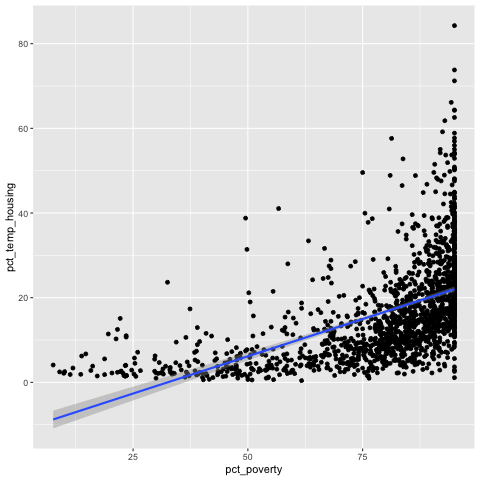

In [42]:
%%R 

ggplot(merged_df) + 
	aes(x=pct_poverty, y=pct_temp_housing) + 
	geom_point() +
	geom_smooth(method='lm')

## Eng Leaners

In [43]:
%%R

model <- lm(pct_temp_housing~pct_eng_learners, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_eng_learners, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.025  -6.941  -1.200   5.347  43.742 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.41838    0.38438   24.50   <2e-16 ***
pct_eng_learners  0.41474    0.01623   25.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.938 on 1583 degrees of freedom
Multiple R-squared:  0.292,	Adjusted R-squared:  0.2915 
F-statistic: 652.8 on 1 and 1583 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


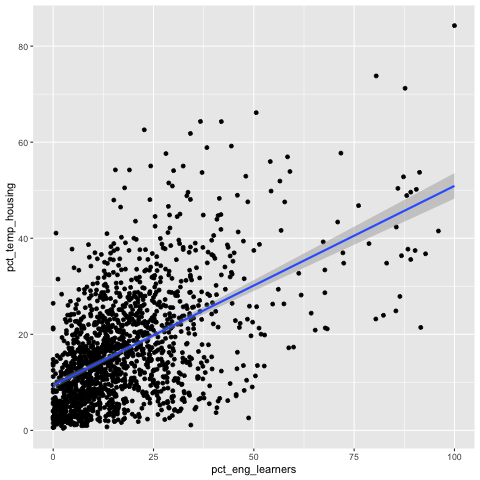

In [44]:
%%R 

ggplot(merged_df) + 
	aes(x=pct_eng_learners, y=pct_temp_housing) + 
	geom_point() +
	geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'


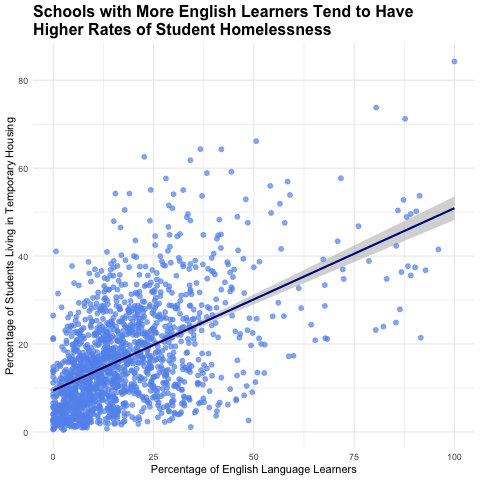

In [45]:
%%R
ggplot(merged_df, aes(x = pct_eng_learners, y = pct_temp_housing)) +
  geom_point(color = "cornflowerblue", size = 2, alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE, color = "blue4") +
  labs(
    x = "Percentage of English Language Learners",
    y = "Percentage of Students Living in Temporary Housing",
    title = "Schools with More English Learners Tend to Have \nHigher Rates of Student Homelessness"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold")
  )


## Disabilities - on school level

In [46]:
%%R

model <- lm(pct_temp_housing~pct_disabilities, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_disabilities, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.161  -8.825  -2.192   6.124  66.450 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.81432    0.54174  32.884   <2e-16 ***
pct_disabilities -0.03712    0.01815  -2.045    0.041 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.79 on 1583 degrees of freedom
Multiple R-squared:  0.002636,	Adjusted R-squared:  0.002006 
F-statistic: 4.183 on 1 and 1583 DF,  p-value: 0.04099



## Multivariable regression on school level

In [48]:
%%R

model <- lm(pct_temp_housing~pct_white + pct_hispanic + pct_poverty + pct_eng_learners, data=merged_df)
summary(model)


Call:
lm(formula = pct_temp_housing ~ pct_white + pct_hispanic + pct_poverty + 
    pct_eng_learners, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.317  -5.550  -1.190   4.261  41.050 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.55008    1.86589   1.367    0.172    
pct_white        -0.16320    0.02300  -7.096 1.94e-12 ***
pct_hispanic      0.06303    0.01156   5.452 5.77e-08 ***
pct_poverty       0.10067    0.02145   4.692 2.93e-06 ***
pct_eng_learners  0.28740    0.01709  16.813  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.809 on 1580 degrees of freedom
Multiple R-squared:  0.4447,	Adjusted R-squared:  0.4433 
F-statistic: 316.3 on 4 and 1580 DF,  p-value: < 2.2e-16



## Residual 

In [50]:
%%R

merged_df <- merged_df %>%
  filter(
    !is.na(pct_temp_housing) &
    !is.na(pct_white) &
    !is.na(pct_hispanic) &
    !is.na(pct_poverty) &
    !is.na(pct_eng_learners)
  )

model <- lm(pct_temp_housing~pct_white + pct_hispanic + pct_poverty + pct_eng_learners, data=merged_df)



In [52]:
%%R

new_df <- merged_df %>%
  mutate(
    predicted = predict(model),
    residuals = resid(model),
    residual_z = scale(residuals)
  ) %>%
  select(school_name, pct_temp_housing, predicted, residuals, residual_z) %>%
  arrange(residual_z)

new_df


                                            school_name pct_temp_housing
1                      P.S. 69 Vincent D. Grippo School        2.5906736
2                             Multicultural High School       21.4285716
3    P.S./I.S. 210 - Twenty-first Century Academy for C        6.6666670
4                             P.S. 105 The Blythebourne        1.1073254
5                             P.S. 163 Flushing Heights        3.6855038
6                            John F. Kennedy Jr. School        6.1913695
7    Inwood Early College for Health and Information Te        3.6723163
8                                P.S. 020 Port Richmond       13.3956388
9                                             P.S. Q255        4.7202796
10                                          Mott Hall V        4.3010753
11                                  P.S. 001 The Bergen       12.8306881
12                       PS280Q: Home of the Lionhearts       17.3277661
13                        High School of World Cult

In [53]:
%%R 

new_df %>% tail(10)

                                            school_name pct_temp_housing
1576 Urban Assembly School of Business for Young Women,         55.03876
1577                                    Restart Academy         54.21304
1578      P.S. 242 - The Young Diplomats Magnet Academy         66.13756
1579                          P.S. 124 Silas B. Dutcher         57.62195
1580                             P.S. 398 Walter Weaver         54.23077
1581                           P.S. 111 Jacob Blackwell         64.28571
1582                      P.S. 045 Clarence Witherspoon         61.80556
1583                           P.S. 38 Roberto Clemente         64.31227
1584                          Academy for New Americans         84.26396
1585                Christopher Avenue Community School         62.57485
     predicted residuals residual_z
1576  20.82761  34.21115   3.888441
1577  19.57701  34.63602   3.936732
1578  30.29206  35.84550   4.074201
1579  21.06185  36.56010   4.155422
1580  17.63201  3

In [54]:
%%R 

new_df %>% head(10)

                                          school_name pct_temp_housing
1                    P.S. 69 Vincent D. Grippo School         2.590674
2                           Multicultural High School        21.428572
3  P.S./I.S. 210 - Twenty-first Century Academy for C         6.666667
4                           P.S. 105 The Blythebourne         1.107325
5                           P.S. 163 Flushing Heights         3.685504
6                          John F. Kennedy Jr. School         6.191370
7  Inwood Early College for Health and Information Te         3.672316
8                              P.S. 020 Port Richmond        13.395639
9                                           P.S. Q255         4.720280
10                                        Mott Hall V         4.301075
   predicted residuals residual_z
1   25.90730 -23.31662  -2.650168
2   43.87127 -22.44270  -2.550838
3   29.07442 -22.40775  -2.546866
4   21.73953 -20.63220  -2.345057
5   23.63629 -19.95079  -2.267608
6   24.74579 -1